## House price prediction whether the house price is above or below median value

In [1]:
import keras

Using TensorFlow backend.
/Users/golnazijadi/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.7
  return f(*args, **kwds)


In [2]:
import pandas as pd
import numpy as np


import xgboost as xgb
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score


In [3]:
df = pd.read_csv('housepricedata.csv')

In [4]:
df.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
LotArea             1460 non-null int64
OverallQual         1460 non-null int64
OverallCond         1460 non-null int64
TotalBsmtSF         1460 non-null int64
FullBath            1460 non-null int64
HalfBath            1460 non-null int64
BedroomAbvGr        1460 non-null int64
TotRmsAbvGrd        1460 non-null int64
Fireplaces          1460 non-null int64
GarageArea          1460 non-null int64
AboveMedianPrice    1460 non-null int64
dtypes: int64(11)
memory usage: 125.5 KB


In [6]:
# convert df into arrays for our machine to process:
dataset = df.values

In [7]:
dataset


array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [8]:
X = dataset[:,0:10]
Y = dataset[:,10]

In [9]:
X

array([[ 8450,     7,     5, ...,     8,     0,   548],
       [ 9600,     6,     8, ...,     6,     1,   460],
       [11250,     7,     5, ...,     6,     1,   608],
       ...,
       [ 9042,     7,     9, ...,     9,     2,   252],
       [ 9717,     5,     6, ...,     5,     0,   240],
       [ 9937,     5,     6, ...,     6,     0,   276]])

In [10]:
Y

array([1, 1, 1, ..., 1, 0, 0])

In [11]:
# The scale of the input features should be similar.
from sklearn import preprocessing

In [12]:
#scales the dataset so that all the input features lie between 0 and 1 
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [13]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [14]:
# Split the dataset into a training set, a validation set and a test set.
from sklearn.model_selection import train_test_split

X_train, X_val_test, Y_train, Y_val_test = train_test_split(X_scale, Y, test_size=0.3)

- Since we want a separate validation set and test set, we can use the same function to do the split again on val_and_test:

In [15]:
X_val, X_test, Y_val, Y_test = train_test_split (X_val_test, Y_val_test, test_size = 0.5)

In [16]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


## Settinng up the architecture of network

<img src='Screenshot 2019-10-01 at 15.07.14.png'/>

- Hidden layer 1: 32 neurons, ReLU activation
- Hidden layer 2: 32 neurons, ReLU activation
- Output Layer: 1 neuron, Sigmoid activation

The first attemp for the prediction is fully connected neural network.

In [17]:
from keras.models import Sequential
from keras.layers import Dense

In [18]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

Instructions for updating:
Colocations handled automatically by placer.


## Configure the model before training step (Compiling)

- which algorithm we want to use to do the optimization.
- What loss function.
- Other metrics.

In [19]:
# ‘sgd’ : to stochastic gradient descent
# 'binary_crossentropy' : The loss function for binary output
# 'accuracy' : Performance metric

model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [20]:
# epochs:how long we want to train the model for (epochs)

hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Instructions for updating:
Use tf.cast instead.
Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 0s 294us/step - loss: 0.6853 - acc: 0.5088 - val_loss: 0.6833 - val_acc: 0.5114
Epoch 2/100
1022/1022 [==============================] - 0s 59us/step - loss: 0.6807 - acc: 0.5068 - val_loss: 0.6793 - val_acc: 0.5114
Epoch 3/100
1022/1022 [==============================] - 0s 54us/step - loss: 0.6766 - acc: 0.5078 - val_loss: 0.6754 - val_acc: 0.5114
Epoch 4/100
1022/1022 [==============================] - 0s 77us/step - loss: 0.6725 - acc: 0.5147 - val_loss: 0.6717 - val_acc: 0.5205
Epoch 5/100
1022/1022 [==============================] - 0s 77us/step - loss: 0.6684 - acc: 0.5264 - val_loss: 0.6679 - val_acc: 0.5342
Epoch 6/100
1022/1022 [==============================] - 0s 76us/step - loss: 0.6642 - acc: 0.5421 - val_loss: 0.6637 - val_acc: 0.5434
Epoch 7/100
1022/1022 [==============================] - 0s 75us/step - loss: 0.6594 - a

1022/1022 [==============================] - 0s 50us/step - loss: 0.3346 - acc: 0.8787 - val_loss: 0.3627 - val_acc: 0.8904
Epoch 59/100
1022/1022 [==============================] - 0s 46us/step - loss: 0.3317 - acc: 0.8796 - val_loss: 0.3605 - val_acc: 0.8813
Epoch 60/100
1022/1022 [==============================] - 0s 47us/step - loss: 0.3288 - acc: 0.8796 - val_loss: 0.3577 - val_acc: 0.8858
Epoch 61/100
1022/1022 [==============================] - 0s 46us/step - loss: 0.3253 - acc: 0.8796 - val_loss: 0.3556 - val_acc: 0.8858
Epoch 62/100
1022/1022 [==============================] - 0s 62us/step - loss: 0.3228 - acc: 0.8787 - val_loss: 0.3530 - val_acc: 0.8813
Epoch 63/100
1022/1022 [==============================] - 0s 55us/step - loss: 0.3200 - acc: 0.8787 - val_loss: 0.3510 - val_acc: 0.8767
Epoch 64/100
1022/1022 [==============================] - 0s 45us/step - loss: 0.3175 - acc: 0.8777 - val_loss: 0.3490 - val_acc: 0.8858
Epoch 65/100
1022/1022 [==============================

In [36]:
hist

In [21]:
model.evaluate(X_test, Y_test)

219/219 [==============================] - 0s 67us/step


[0.2619142699731539, 0.8995433798119358]

## Visualising loss and accuracy of the NN 

To recognise wheter the model overfit or not, we plot.

From the result, we can recognise that the model is not overfit.

In [22]:
import matplotlib.pyplot as plt

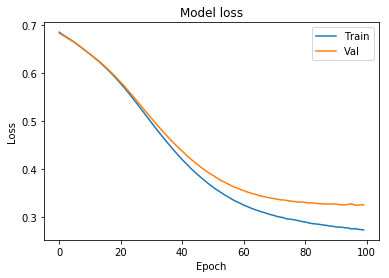

In [23]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


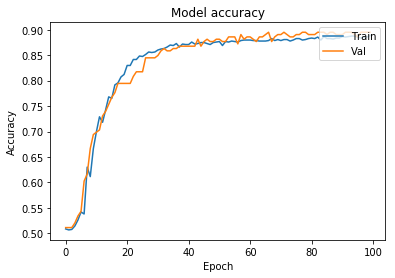

In [24]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

## Create an overfit model and define a regulariser to fix the problem.


In [ ]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy']) 

hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

In [ ]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


In [ ]:
plt.plot(hist_2.history['acc'])
plt.plot(hist_2.history['val_acc'])
plt.title('Model loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

Above plots illustrate overfitting the model during the training.
  We need to reduce overfitting of the model.

- To deal with overfitting, we can code in the following strategies into our model each with about one line of code:

- L2 Regularization
- L1 Regularization
- Dropout

In [ ]:
## Test L2 regularizer

from keras.layers import Dropout
from keras import regularizers

In [ ]:
# Add L2 Regulizer into the hidden layers with and weight them by 0.01 in the loss function.
# Add Dropout as a new layer. This means that the neurons in the previous layer has a probability of 0.3 in dropping out during training.

model_3 = Sequential([
   Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
   #Dropout(0.3),
   Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
   #Dropout(0.3),
   Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
   #Dropout(0.3),
   Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
   #Dropout(0.3),
   Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])



In [ ]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

In [ ]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [ ]:
plt.plot(hist_3.history['acc'])
plt.plot(hist_3.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

Compared to our model in Model 2, we’ve reduced overfitting substantially! And that’s how we apply our regularization techniques to reduce overfitting to the training set.

### Now we want to compare the proposed model with XGBoost 

In [26]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import xgboost as xgb
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score

from xgboost import plot_importance, plot_tree, XGBClassifier
from sklearn.model_selection import GridSearchCV

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

In [29]:
xgb_model = xgb.XGBClassifier()
        
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb_model,
                        parameters,
                        cv = 3,
                        n_jobs = 5,
                        verbose=True)



In [31]:
hist_4=xgb_grid.fit(X_train, Y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  27 out of  27 | elapsed:   32.6s finished


In [32]:
prediction = xgb_grid.predict(X_test)

In [34]:
def get_metrics(test, predictions):
    MSE = metrics.mean_squared_error(test, predictions)
    RMSE = np.sqrt(metrics.mean_squared_error(test, predictions))
    Acc = metrics.accuracy_score(test,prediction)
    print('RMSE=%f, MSE=%f, Acc=%f' % (RMSE,MSE,Acc))
    return {'RMSE' : RMSE, 'MSE' : MSE, 'Accuracy': Acc}

from sklearn import metrics
results_test1=get_metrics(Y_test, prediction)

RMSE=0.255085, MSE=0.065068, Acc=0.934932


In [35]:
results_test1

{'RMSE': 0.25508526643200097,
 'MSE': 0.06506849315068493,
 'Accuracy': 0.934931506849315}

In [53]:
# The figure below illustrates the comparison bewteen CNN and XGBoost
Acc_df = pd.DataFrame(columns=['XGBoost_acc','CNN_acc'],index=[1])

In [54]:
Acc_df['XGBoost_acc'] = 0.934931506849315

In [55]:
Acc_df['CNN_acc'] = 0.8995433798119358

In [56]:
print(Acc_df)

   XGBoost_acc   CNN_acc
1     0.934932  0.899543


Text(0, 0.5, 'Accuracy')

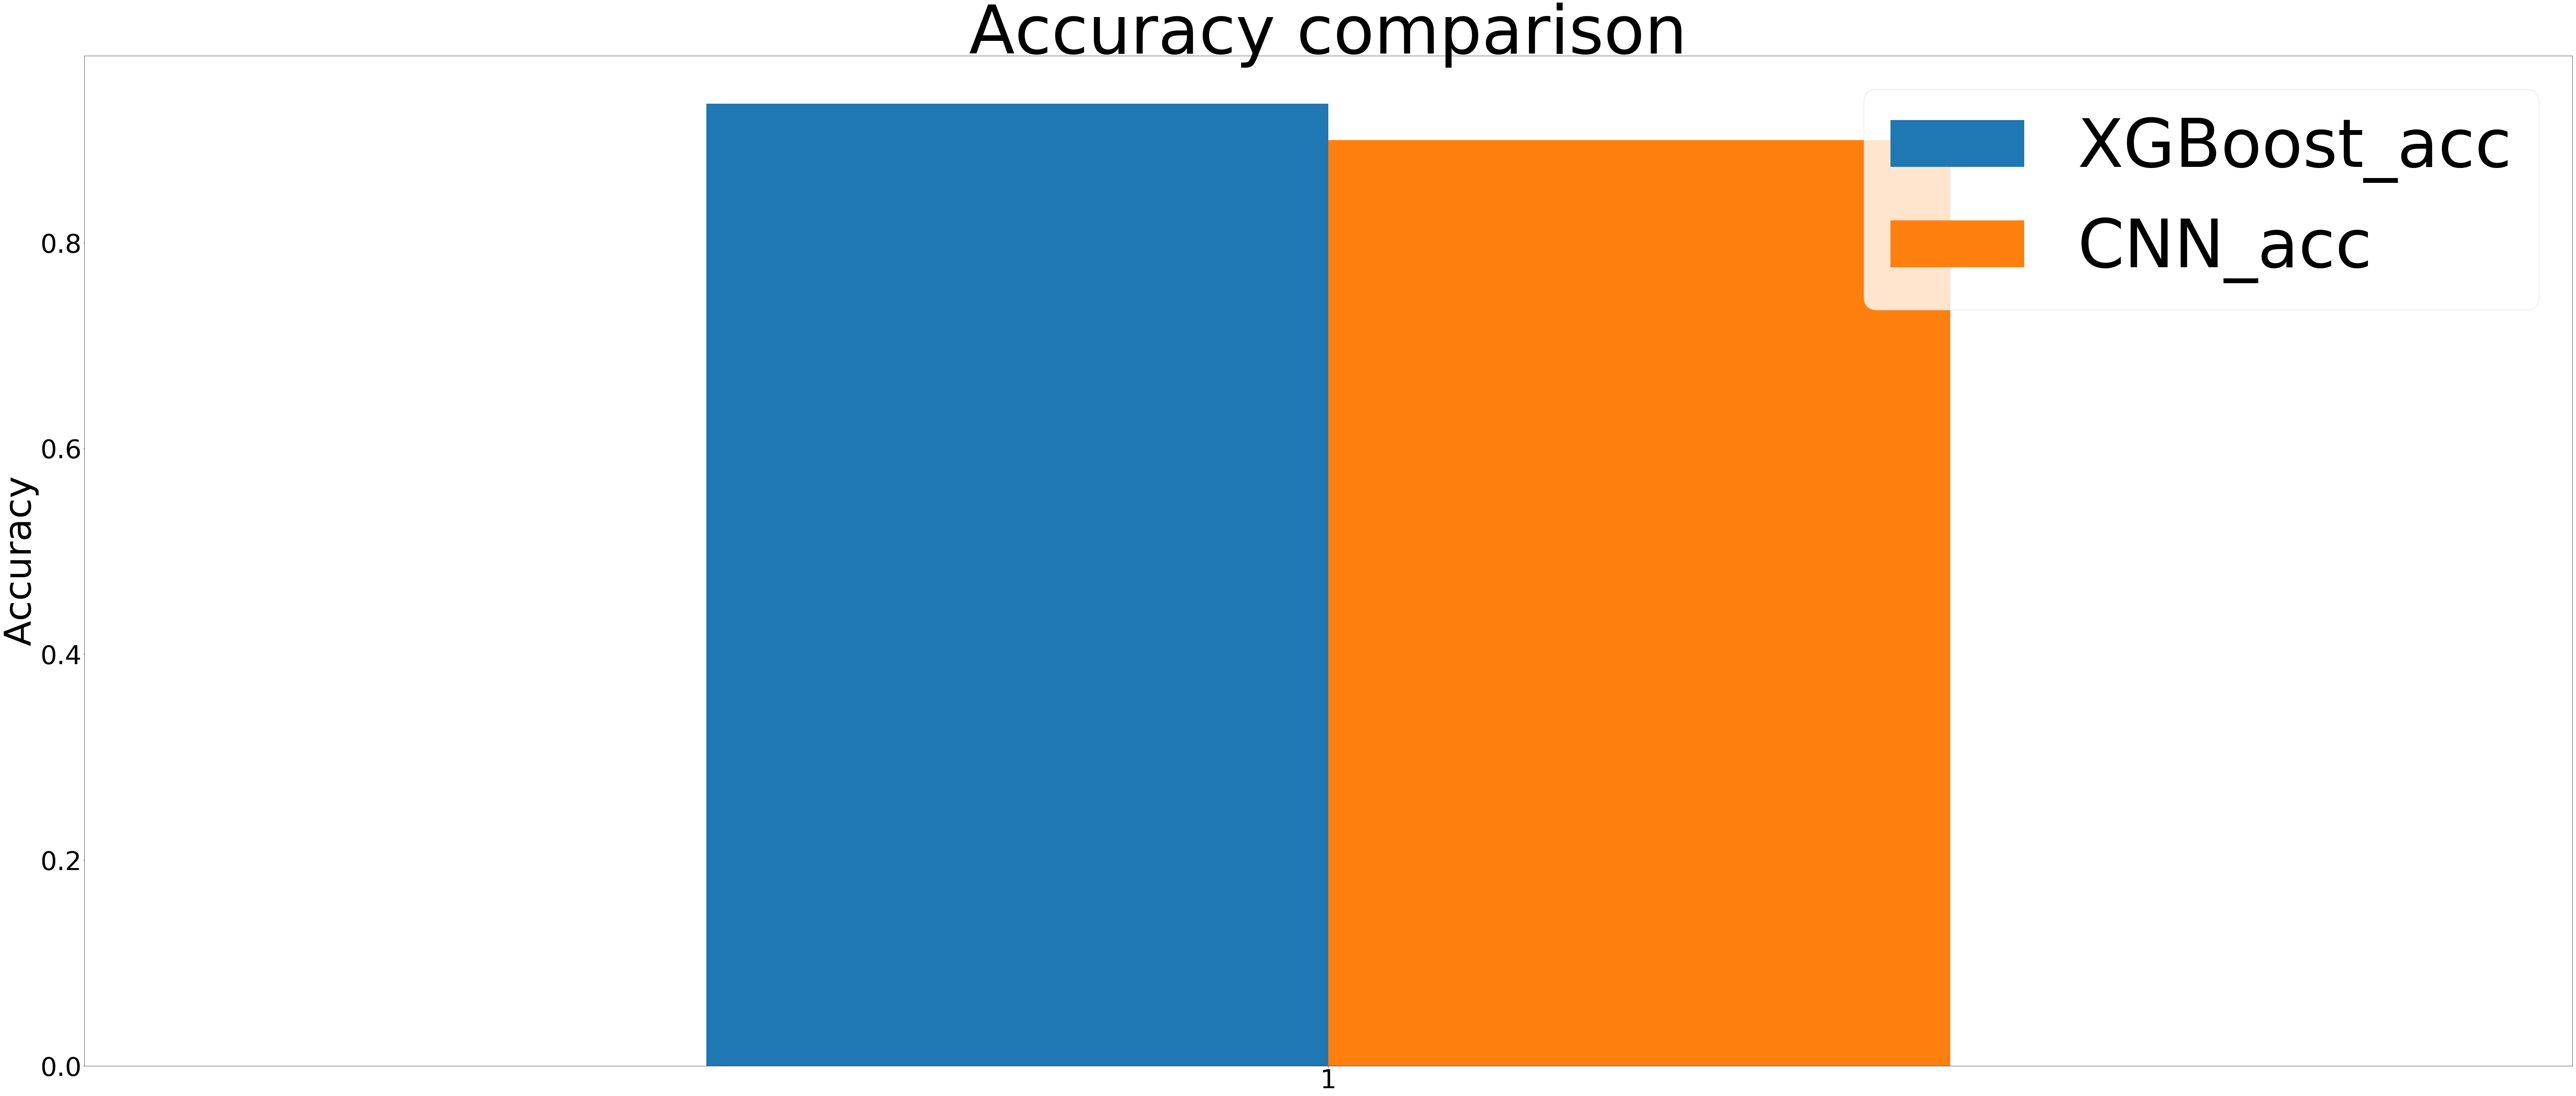

In [59]:





#df1 = df1.set_index('sensor')
ax = Acc_df.plot.bar(y=['XGBoost_acc','CNN_acc'], rot=0, figsize=(120,50), fontsize= 70)
ax.legend(fontsize = 180, loc = 'upper right')
ax.set_title('Accuracy comparison', fontdict={'fontsize': 180, 'fontweight': 'medium'})
#ax.set_xlabel('Sensor', fontdict={'fontsize': 100, 'fontweight': 'medium'})
ax.set_ylabel('Accuracy', fontdict={'fontsize': 100, 'fontweight': 'medium'})
#plt.savefig('MAEs.png')
#plt.savefig('MAEs_test.png')